# Hitchhiker's Guide to APIs

## The problem

First, let's visit [a website](https://www.washingtonpost.com/).

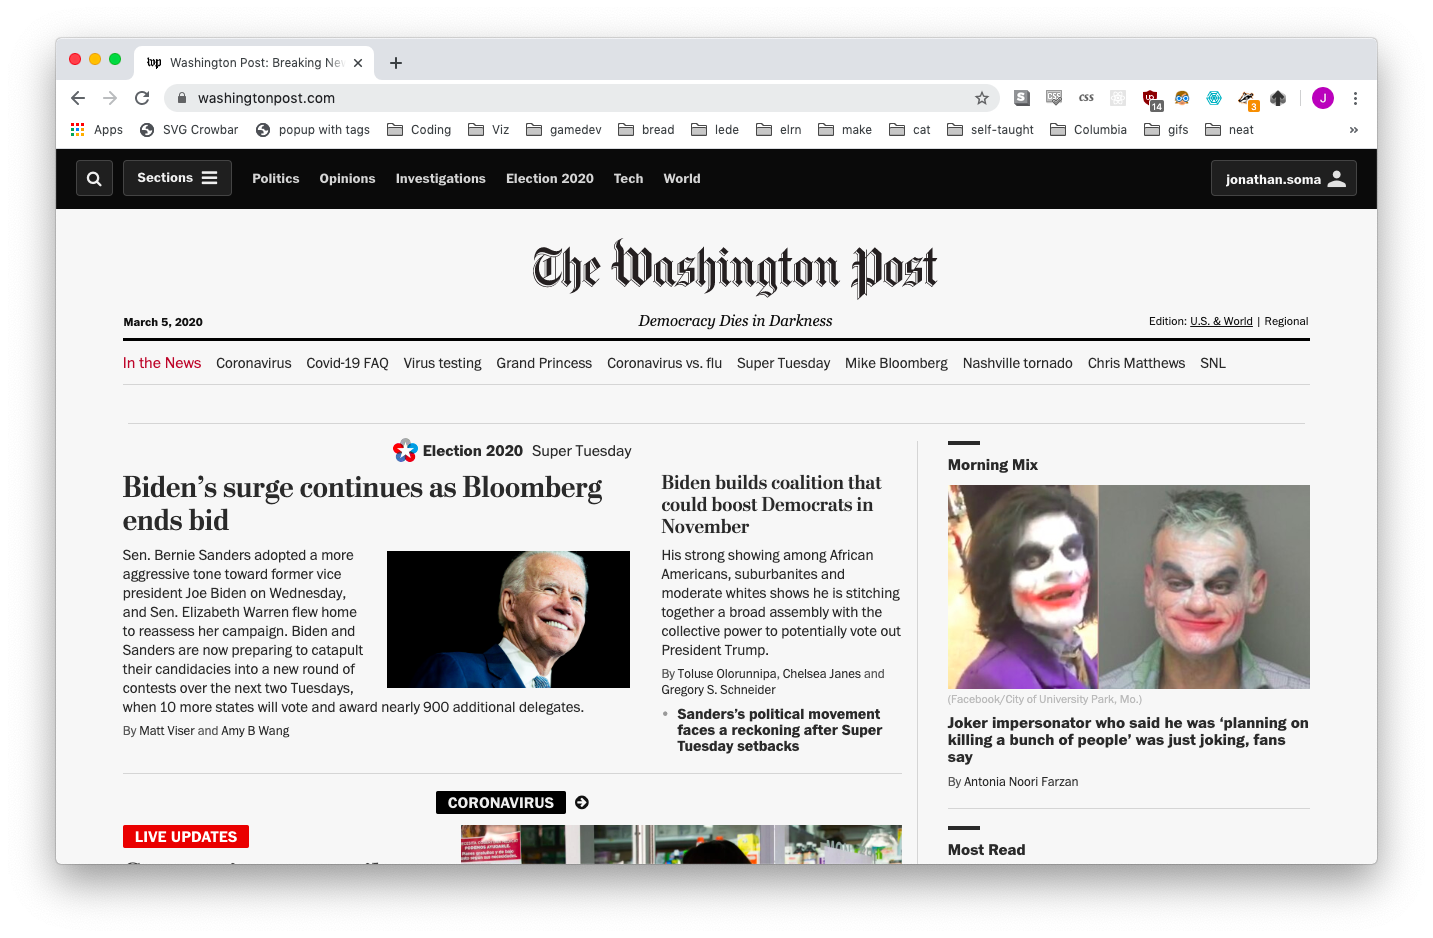

It looks so nice! So wonderful! Try to pick out the **titles**, the **bylines**, the **article summaries** and the **pictures that go with each article**.

While we see it visually, each page is made up of **code**. We can see that code by right-clicking and selecting **View source**.

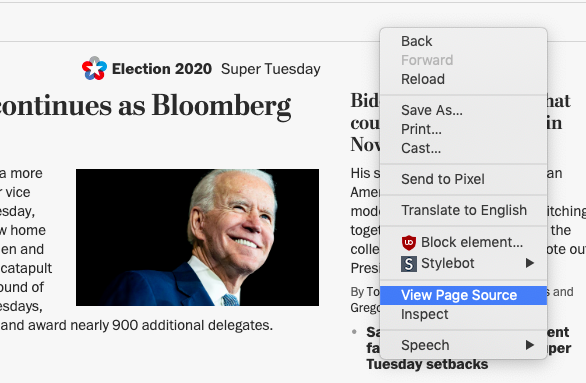

Here's the source code:

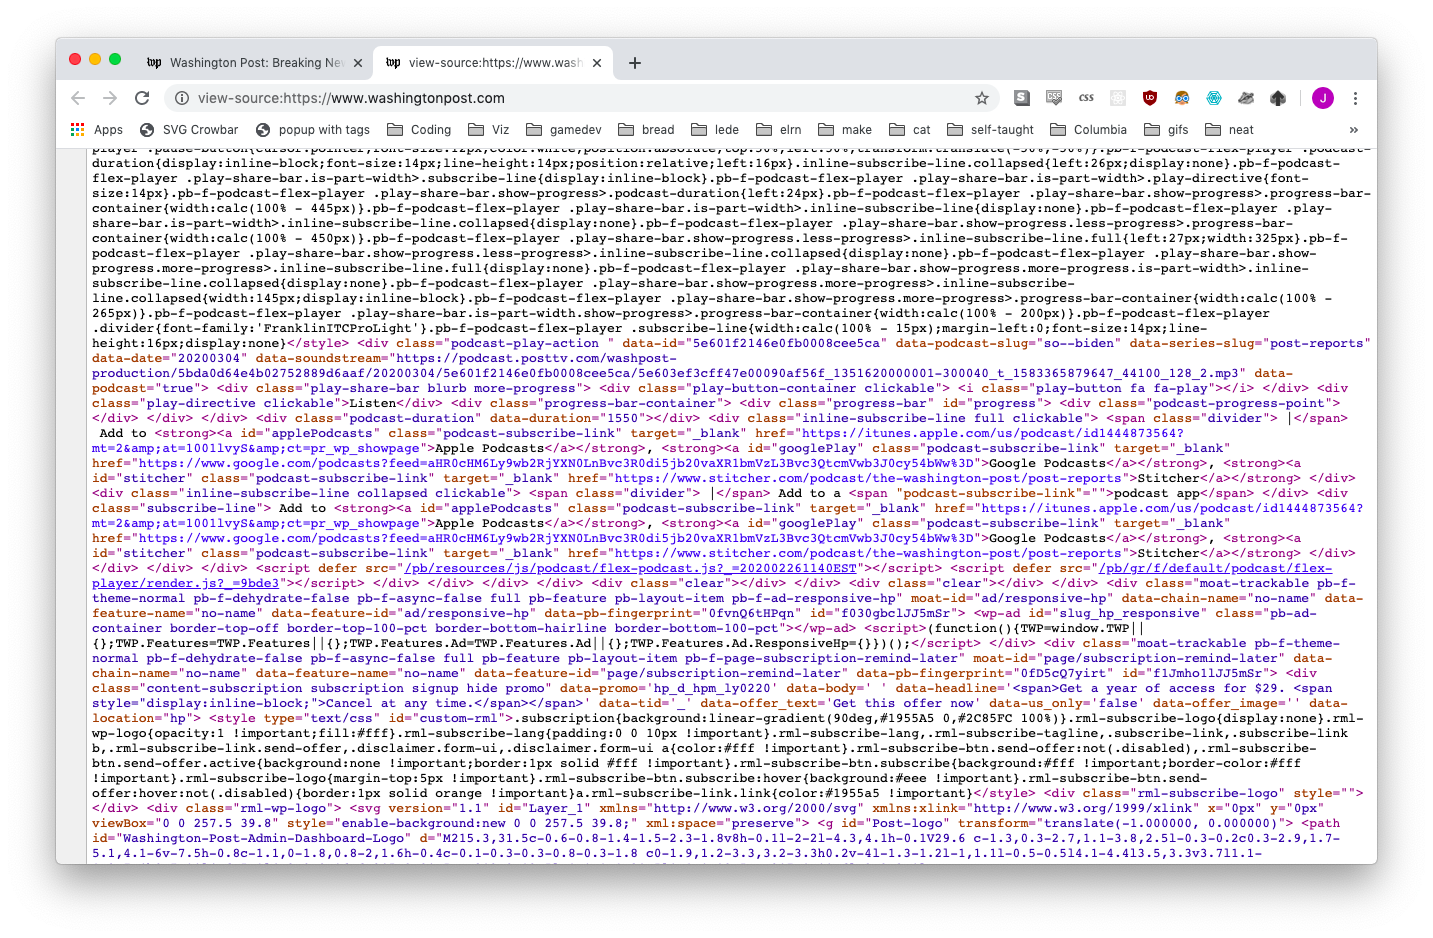

**Discussion:** What does this have to do with the visuals we saw above?

## APIs

An API - Application Programming Interface - is just a way of saying "things computers can understand." Computers can understand this:

In [ ]:
print("Hello world")

Computers can also understand this:

In [ ]:
{
    "session": "Hitchhiker's Guide to APIs",
    "type": "hands-on",
    "instructor": "Jonathan Soma"
}

We're mostly going to be focusing on **web APIs that deal with data.** Kind of, somewhat.

An easy place to track down APIs is **a government open data portal.** You might try [New Orleans' Open Data Portal](https://data.nola.gov/) and find out it's actually pretty rough, and instead meander over to [Baton Rouge's Open Data Portal](https://data.brla.gov/) instead. Click **Browse Data** to see all the data they have, and [sort by recently updated](https://data.brla.gov/browse?sortBy=last_modified).

So many things updated in the past day! Amazing! You're incredible, Baton Rouge!

**Discussion topic:** What's going on?

## Crime, always crime

Everyone's favorite topic is **crime**, so let's submit to that and [Baton Rouge Crime Incidents](https://data.brla.gov/Public-Safety/Baton-Rouge-Crime-Incidents/fabb-cnnu). We can easily [browse it](https://data.brla.gov/Public-Safety/Baton-Rouge-Crime-Incidents/fabb-cnnu/data) or [download a CSV](https://data.brla.gov/api/views/fabb-cnnu/rows.csv?accessType=DOWNLOAD).

But we're here to talk about **APIs**, so let's click around under **Export** and find whatever has the word **API** on it.

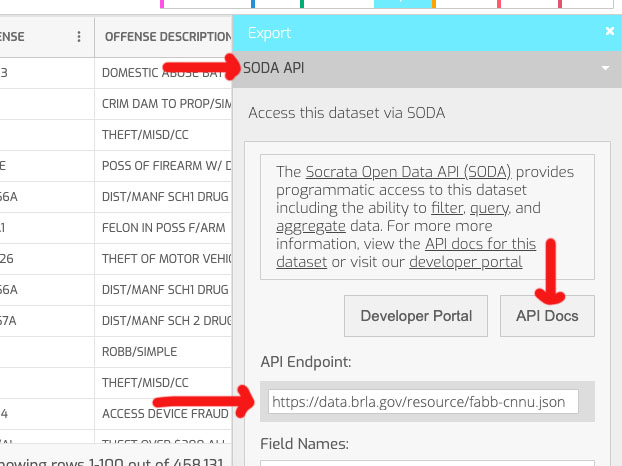

The **API Endpoint** sounds like something cool and good, let's look at it: [https://data.brla.gov/resource/fabb-cnnu.json](https://data.brla.gov/resource/fabb-cnnu.json)

```
[{"file_number":"2000020176","offense_date":"2020-03-04T00:00:00.000","offense_time":"0135","crime":"BATTERY","a_c":"COMMITTED","offense":"13:35.3","offense_desc":"DOMESTIC ABUSE BATTERY/CC","address":"3548 RIDGEMONT DR","st_number":"3548","st_name":"RIDGEMONT","st_type":"DR","city":"BATON ROUGE","state":"LA","new_zip":"70814","district":"3","zone":"A","subzone":"3","complete_district":"3A3","council":"5","crime_prevention_dist":"PARK FOREST","geolocation":{"latitude":"30.481541","longitude":"-91.070749","human_address":"{\"address\": \"3548 RIDGEMONT DR\", \"city\": \"BATON ROUGE\", \"state\": \"LA\", \"zip\": \"70815\"}"},":@computed_region_8siy_mghw":"2",":@computed_region_i2e6_956r":"5",":@computed_region_uvg4_nwq8":"18",":@computed_region_idcr_7zcb":"18",":@computed_region_jrqt_zu77":"2",":@computed_region_8tu6_j4iw":"9845",":@computed_region_hfgy_t898":"5",":@computed_region_92rf_uvyc":"1",":@computed_region_9v63_zwfd":"5",":@computed_region_qfmj_2fwi":"57",":@computed_region_tqy7_429i":"25",":@computed_region_tm4z_r3je":"5"}
,{"file_number":"2000020144","offense_date":"2020-03-03T00:00:00.000","offense_time":"2331","crime":"CRIMINAL DAMAGE TO PROPERTY","a_c":"COMMITTED","offense":"13:56","offense_desc":"CRIM DAM TO PROP/SIMPLE/CC","address":"12451 CATE AV","st_number":"12451","st_name":"CATE","st_type":"AV","city":"BATON ROUGE","state":"LA","new_zip":"70815","district":"3","zone":"D","subzone":"2","complete_district":"3D2","council":"6","crime_prevention_dist":"NONE","geolocation":{"latitude":"30.463379","longitude":"-91.044452","human_address":"{\"address\": \"12451 CATE AV\", \"city\": \"BATON ROUGE\", \"state\": \"LA\", \"zip\": \"\"}"},":@computed_region_8siy_mghw":"18",":@computed_region_i2e6_956r":"6",":@computed_region_uvg4_nwq8":"29",":@computed_region_idcr_7zcb":"29",":@computed_region_jrqt_zu77":"18",":@computed_region_8tu6_j4iw":"9847",":@computed_region_hfgy_t898":"6",":@computed_region_92rf_uvyc":"46",":@computed_region_9v63_zwfd":"6",":@computed_region_qfmj_2fwi":"42",":@computed_region_tqy7_429i":"11",":@computed_region_tm4z_r3je":"6"}
.....
.....
.....
```

Uh okay sure, cool, I guess? It looks like it's something called **JSON**.


## Being visual about it

We'll use [Postman](https://www.postman.com/) to work through this a little bit.

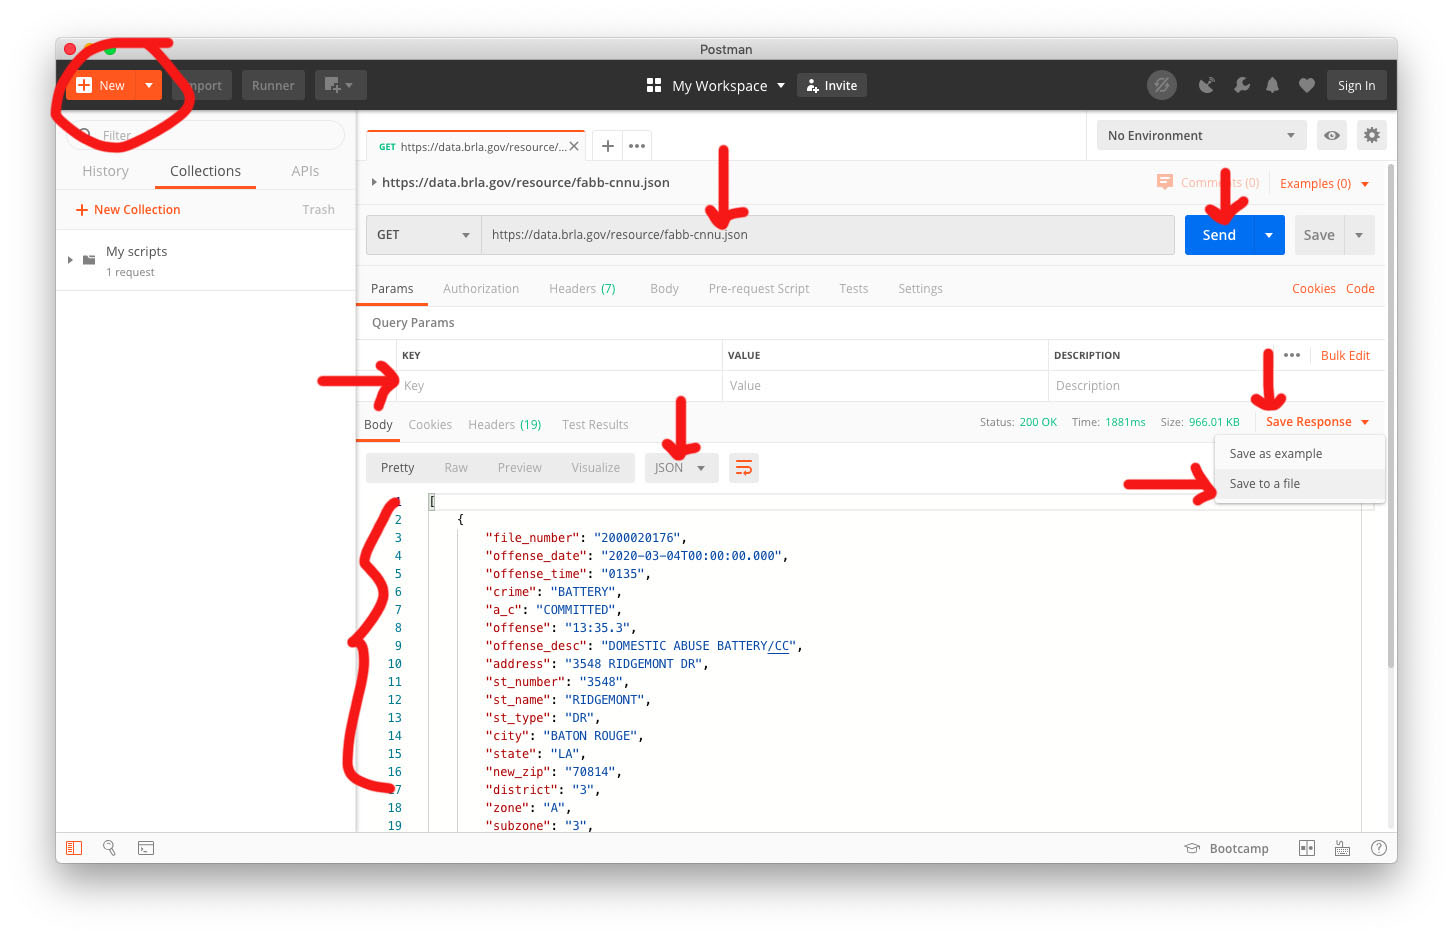

### Using the JSON output

If you aren't too sure about how JSON works, you can convert the contents of a lot of APIs into CSV format using [online tools](https://json-csv.com/).

## Being programmers about it

We could also be programmers about it!

In [ ]:
# Requests will download the dataset for us
import requests

response = requests.get('https://data.brla.gov/resource/fabb-cnnu.json')
response.json()

In [ ]:
# We could also give it to pandas to turn it into a filterable CSV-y thing

import pandas as pd
pd.set_option("display.max_columns", 100)

response = requests.get('https://data.brla.gov/resource/fabb-cnnu.json')
df = pd.DataFrame(response.json())
df.head()

In [ ]:
# Just like Postman, we can use filters!
response = requests.get('https://data.brla.gov/resource/fabb-cnnu.json?offense_desc=ASSAULT/AGG')
df = pd.DataFrame(response.json())
df.head()

## APIs for APIs

What's up with the [API documenation page](https://dev.socrata.com/foundry/data.brla.gov/fabb-cnnu)? We love Python and know the word "pandas" so let's click "Python pandas."

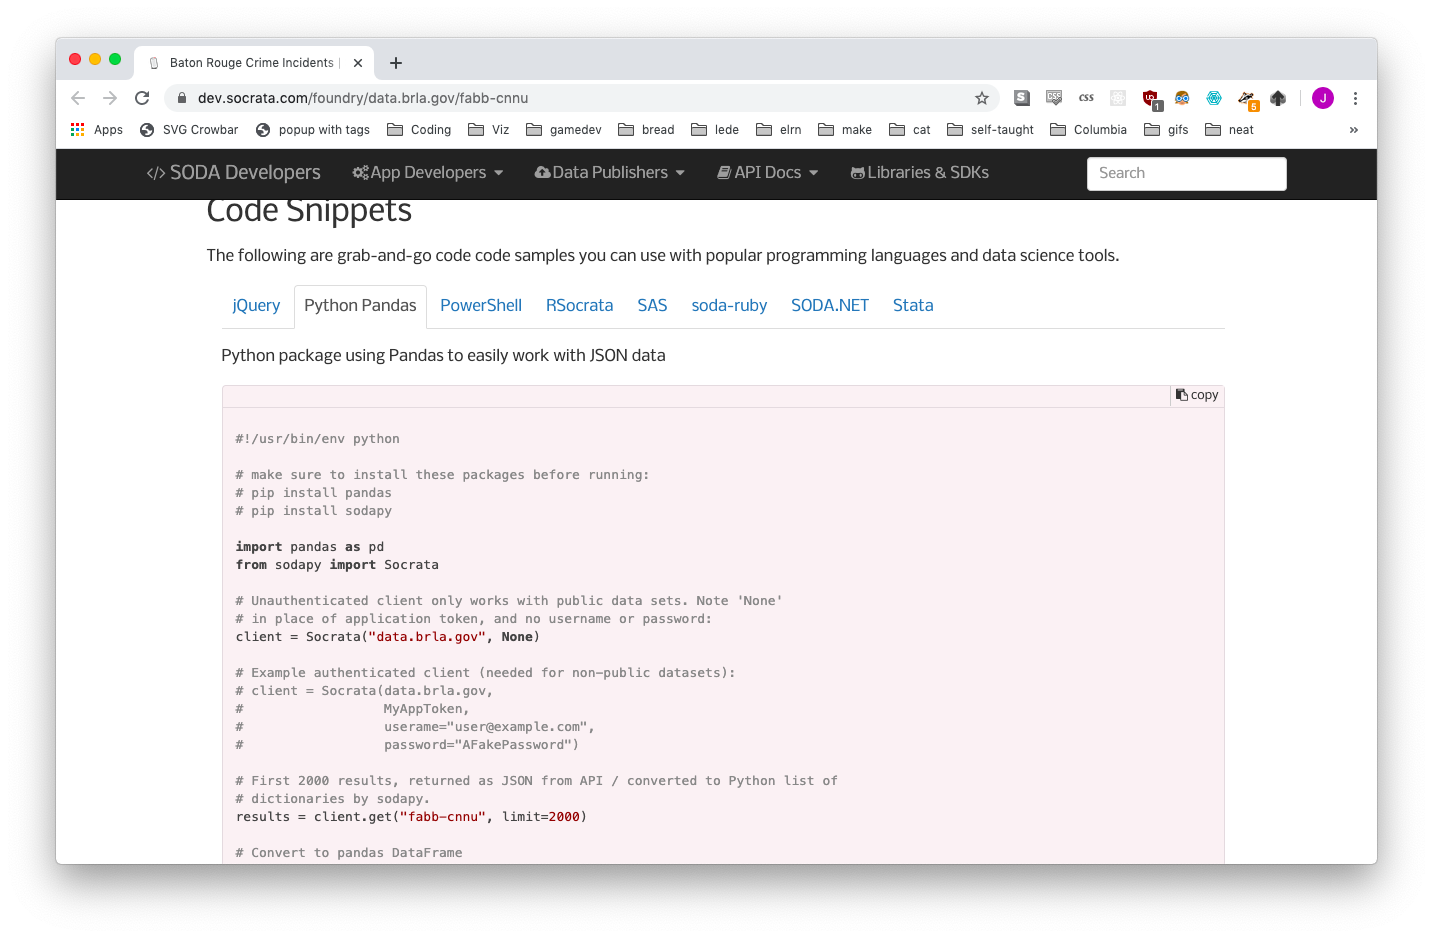

It seems to have a lot of the same kind of words (?), but it doesn't have a URL in there. But it gets the data, right?

This is a **different kind of API**. It's a **Python library API** instead of a **web API**. This means it's a way of talking to *Python* instead of a way of talking to the *web*. Behind the scenes Python is talking to the web API for you and doing the dirty work of putting all those parameters in the URL and making the request.

Why's this a big deal? Sometimes it's just easier to write Python than trying to talk to a URL! Not always, but sometimes.

**Let's do it!** We'll first install the library that Socrata Open Data uses in the code above, `sodapy`.

In [ ]:
# Install sodapy
!pip install sodapy

Now we can adapt the code from the example.

In [ ]:
from sodapy import Socrata

# Connect to Baton Rouge Open Data
client = Socrata("data.brla.gov", None)

# Ask for this dataset, 200 rows
results = client.get("fabb-cnnu", limit=200)

# Send it to pandas
results_df = pd.DataFrame.from_records(results)
results_df.head()

### Changing up cities

We can do this [from anywhere](https://controllerdata.lacity.org/Revenue/city-revenue-by-month-transportation/ymah-xfmh)

In [ ]:
client = Socrata("controllerdata.lacity.org", None)

# load the data
crime_df = pd.DataFrame(client.get('ymah-xfmh', limit=10))
crime_df.head()

## API keys

We keep getting a weird warning:

```
WARNING:root:Requests made without an app_token will be subject to strict throttling limits.
```

Sometimes you need to tell the API who you are! That way it can be rude to the people who use it too much or charge you money or whatever. We'll come back to that in a little bit.

# Other APIs

While Socrata runs a lot of Open Data portals and standardizes the way you interact with them, almost every other API is totally unique! Let's visit the weather service [Dark Sky](http://darksky.net/) and sign up for an account.

Once you click into the developer section, it gives you a nice example API call. How nice! But wait, **why's the URL look so weird?**

## API keys

When you use some APIs, you need to prove who you are in order for them to allow you to use the service. Socrata will allow you to make a few calls without signing up, but Dark Sky demands that you always always always have an API key.

* API keys are sometimes **in the URL:** http://www.example.com/api/d34db33f/planets
* API keys are sometimes **a parameter in the URL:** http://www.example.com/api/planets?api_key=d34db33f
* API keys are sometimes **separate keys you have to combine using a terrible thing called OAuth that we won't talk about here,** but oh boy I hope you're using a library if you run into that.
* **Signed requests** use the API key and a little bit of encryption magic to confirm that yes, it's you, and yes, that's exactly the request you wanted to make. If you run across these it's also best to switch to a library.

## Using Postman

Let's start by testing out the DarkSky URL using Postman, and seeing how to adjust it to import the data for another location.

## Using Python

Now let's try using Python/pandas. It's going to be a little different than last time!

In [ ]:
response = requests.get('https://api.darksky.net/forecast/15074402c474e3dab67f7377e1f95519/48.8267,-74.4233')
pd.DataFrame(response.json()['hourly']['data'])

## Using Python, v2

Are there Python bindings for the API?

In [ ]:
!pip install darksky_weather

In [ ]:
from darksky.api import DarkSky, DarkSkyAsync
from darksky.types import languages, units, weather

API_KEY = '15074402c474e3dab67f7377e1f95519'

# Synchronous way
darksky = DarkSky(API_KEY)

latitude = 42.3601
longitude = -71.0589
forecast = darksky.get_forecast(
    latitude, longitude,
    extend=False, # default `False`
    lang=languages.ENGLISH, # default `ENGLISH`
    values_units=units.AUTO, # default `auto`
    exclude=[weather.MINUTELY, weather.ALERTS], # default `[]`,
    timezone='UTC' # default None - will be set by DarkSky API automatically
)


In [ ]:
forecast.currently.temperature

# Secret APIs

Socrata APIs are usually useless since the data often also comes as a CSV. Other APIs are often useless because you can just use a library instead of beautiful hand-crafted web urls.

But there's one very very very important time that APIs are useful: **super secret website APIs!** If you've ever tried to scrape a site and failed because the URLs didn't seem to "work right," let's show the best-kept secret of scraping: skipping scraping at all, and using the provider's unadvertised API!

# Other APIs

While data APIs are the most common kind in data journalism, once you know how APIs work there are many, many others that you might want to use.

* **Geocoding APIs** can convert locations into latitude and longitude. Google Maps has a good one (sining up for billing is a bit complicated) while the Census Bureau has a free one (but slow and somewhat picky).
* **Communication APIs** enable you to text or call (Twilio) or send emails (Mailgun, Sendgrid).
* **Billing APIs** can be used to charge people money. Stripe has high fees but excellent documentation, while you can also use ones like Paypal.

For most of these APIs they'll offer up both a talk-directly-to-a-URL API, as well as a official or unofficial libraries. Which one you use is up to you, go with whatever you feel more comfortable with.